In [13]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from itables import init_notebook_mode
from itables import show
import plotly.express as px
from plotly.offline import iplot, init_notebook_mode
import plotly.offline as py
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv('../../Data/FuentesOriginales/USAR/world_population_2.csv')
df.head(10)

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
5,42,AGO,Angola,Luanda,Africa,35588987,33428485,28127721,23364185,16394062,11828638,8330047,6029700,1246700,28.5466,1.0315,0.45
6,224,AIA,Anguilla,The Valley,North America,15857,15585,14525,13172,11047,8316,6560,6283,91,174.2527,1.0066,0.00
7,201,ATG,Antigua and Barbuda,Saint John’s,North America,93763,92664,89941,85695,75055,63328,64888,64516,442,212.1335,1.0058,0.00
8,33,ARG,Argentina,Buenos Aires,South America,45510318,45036032,43257065,41100123,37070774,32637657,28024803,23842803,2780400,16.3683,1.0052,0.57
9,140,ARM,Armenia,Yerevan,Asia,2780469,2805608,2878595,2946293,3168523,3556539,3135123,2534377,29743,93.4831,0.9962,0.03


RENOMBRAR LA COLUMNA COUNTRY/TERRITORI por COUNTRY

In [18]:
df.rename(columns={'Country/Territory':'Country'}, inplace = True)

RENOMBRA LA COLUMNA YEAR POPULATIO por YEAR

In [19]:
for col in df.columns:
    if 'Population' and '0' in col:
        df = df.rename(columns={col: col.split(' ')[0]})
        
df.head(3)

,Rank,CCA3,Country,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56


REVISANDO NULOS

In [20]:
df.isnull().sum()

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022                           0
2020                           0
2015                           0
2010                           0
2000                           0
1990                           0
1980                           0
1970                           0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

REVISANDO DUPLICADOS

In [21]:
df.duplicated().sum()

0

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022                         234 non-null    int64  
 6   2020                         234 non-null    int64  
 7   2015                         234 non-null    int64  
 8   2010                         234 non-null    int64  
 9   2000                         234 non-null    int64  
 10  1990                         234 non-null    int64  
 11  1980                         234 non-null    int64  
 12  1970                         234 non-null    int64  
 13  Area (km²)          

In [23]:
df.nunique()

Rank                           234
CCA3                           234
Country                        234
Capital                        234
Continent                        6
2022                           234
2020                           234
2015                           234
2010                           234
2000                           234
1990                           234
1980                           234
1970                           234
Area (km²)                     233
Density (per km²)              234
Growth Rate                    180
World Population Percentage     70
dtype: int64

Los nombres de columna que son números enteros (como los años) pueden generar cierta confusión. Por ejemplo, cuando nos referimos al año 2010, uno podría confundirse con el índice posicional 2010th.

Para evitar esta ambigüedad, convirtamos los nombres de las columnas en cadenas: '1970' a '2010'.

In [24]:
# CONVERTIMOS LAS COLUMNAS EN STRINGS
df.columns = list(map(str, df.columns))

Dado que convertimos los años en cadenas, declaremos una variable que nos permitirá llamar fácilmente a la gama completa de años.

In [25]:
years = list(map(str, (1970, 1980, 1990, 2000, 2010, 2015, 2020, 2022)))
years

['1970', '1980', '1990', '2000', '2010', '2015', '2020', '2022']

HECHAMOS UN VISTASO AL DATA FRAME

In [26]:
df.describe().T.sort_values(ascending=0, by="mean")

,count,mean,std,min,25%,50%,75%,max
2022,234.0,3.407441e+07,1.367664e+08,510.0000,419738.500000,5.559944e+06,2.247650e+07,1.425887e+09
2020,234.0,3.350107e+07,1.355899e+08,520.0000,415284.500000,5.493074e+06,2.144798e+07,1.424930e+09
2015,234.0,3.172996e+07,1.304050e+08,564.0000,404676.000000,5.307400e+06,1.973085e+07,1.393715e+09
2010,234.0,2.984524e+07,1.242185e+08,596.0000,393149.000000,4.942770e+06,1.915957e+07,1.348191e+09
2000,234.0,2.626947e+07,1.116982e+08,651.0000,327242.000000,4.292907e+06,1.576230e+07,1.264099e+09
1990,234.0,2.271022e+07,9.783217e+07,700.0000,264115.750000,3.825410e+06,1.186923e+07,1.153704e+09
1980,234.0,1.898462e+07,8.178519e+07,733.0000,229614.250000,3.141146e+06,9.826054e+06,9.823725e+08
1970,234.0,1.578691e+07,6.779509e+07,752.0000,155997.000000,2.604830e+06,8.817329e+06,8.225344e+08
Area (km²),234.0,5.814494e+05,1.761841e+06,1.0000,2650.000000,8.119950e+04,4.304258e+05,1.709824e+07
Density (per km²),234.0,4.521270e+02,2.066122e+03,0.0261,38.417875,9.534675e+01,2.389332e+02,2.317227e+04


In [28]:
# CREAMOS EL DATA FRAME LLAMADO CONTINENT

continent_df = df.groupby(by='Continent').sum()
continent_df.head(3)

,Rank,CCA3,Country,Capital,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Continent,,,,,,,,,,,,,,,,
Africa,5253,DZAAGOBENBWABFABDICMRCPVCAFTCDCOMDJICODEGYGNQE...,AlgeriaAngolaBeninBotswanaBurkina FasoBurundiC...,AlgiersLuandaPorto-NovoGaboroneOuagadougouBuju...,1426730932,1360671810,1201102442,1055228072,818946032,638150629,481536377,365444348,30317963,7127.7158,58.2109,17.87
Asia,3878,AFGARMAZEBHRBGDBTNBRNKHMCHNGEOHKGINDIDNIRNIRQI...,AfghanistanArmeniaAzerbaijanBahrainBangladeshB...,KabulYerevanBakuManamaDhakaThimphuBandar Seri ...,4721383274,4663086535,4458250182,4220041327,3735089604,3210563577,2635334228,2144906290,32138141,51251.2068,50.4692,59.19
Europe,6225,ALBANDAUTBLRBELBIHBGRHRVCYPCZEDNKESTFROFINFRAD...,AlbaniaAndorraAustriaBelarusBelgiumBosnia and ...,TiranaAndorra la VellaViennaMinskBrusselsSaraj...,743147538,745792196,741535608,735613934,726093423,720320797,692527159,655923991,23010411,33166.2371,50.1128,9.33


CREAMOS EL DATA FRAME COUNTRY

In [29]:
country_df = df.groupby(by='Country').sum()
country_df.head(3)

,Rank,CCA3,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Country,,,,,,,,,,,,,,,,
Afghanistan,36,AFG,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
Albania,138,ALB,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
Algeria,34,DZA,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56


POBLACION MUNDIAL ACTUAL 2022

In [30]:
df['2022'].sum()

7973413042

DISTRIBUCION DE LA POBLACION POR CONTINENTE

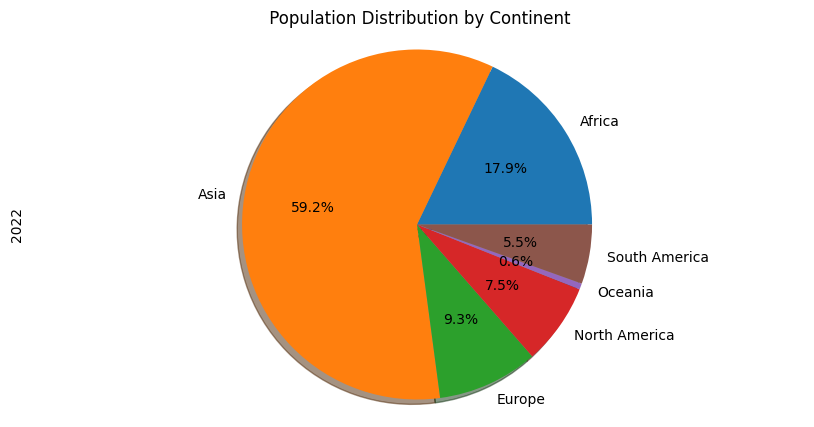

In [31]:
continent_df['2022'].plot(kind = 'pie', figsize=(10,5), shadow=True, autopct='%1.1f%%') # autopct create %
plt.title(' Population Distribution by Continent')
plt.axis('equal')
plt.show()

TASA MEDIA DEL CRECIMIENTO DE LA POBLACION MUNDIAL

In [32]:
df['Growth Rate'].mean()

1.0095773504273504

Desde 1972 (hace 50 años), la tasa de crecimiento de la población mundial disminuyó de alrededor del 2% anual a menos del 1,0% anual.

Creando el Data Frame para los 10 países principales con la tasa de crecimiento más alta

In [33]:
gwr_top10 = df.sort_values(by='Country').sort_values(by='Growth Rate', ascending=False).head(10)

gwr_top10.head(3)

,Rank,CCA3,Country,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage
133,135,MDA,Moldova,Chisinau,Europe,3272996,3084847,3277388,3678186,4251573,4480199,4103240,3711140,33846,96.7026,1.0691,0.04
164,37,POL,Poland,Warsaw,Europe,39857145,38428366,38553146,38597353,38504431,38064255,35521429,32482943,312679,127.4698,1.0404,0.50
148,54,NER,Niger,Niamey,Africa,26207977,24333639,20128124,16647543,11622665,8370647,6173177,4669708,1267000,20.6851,1.0378,0.33


trazado de los 10 países con mayor tasa de crecimiento en los últimos 30 años

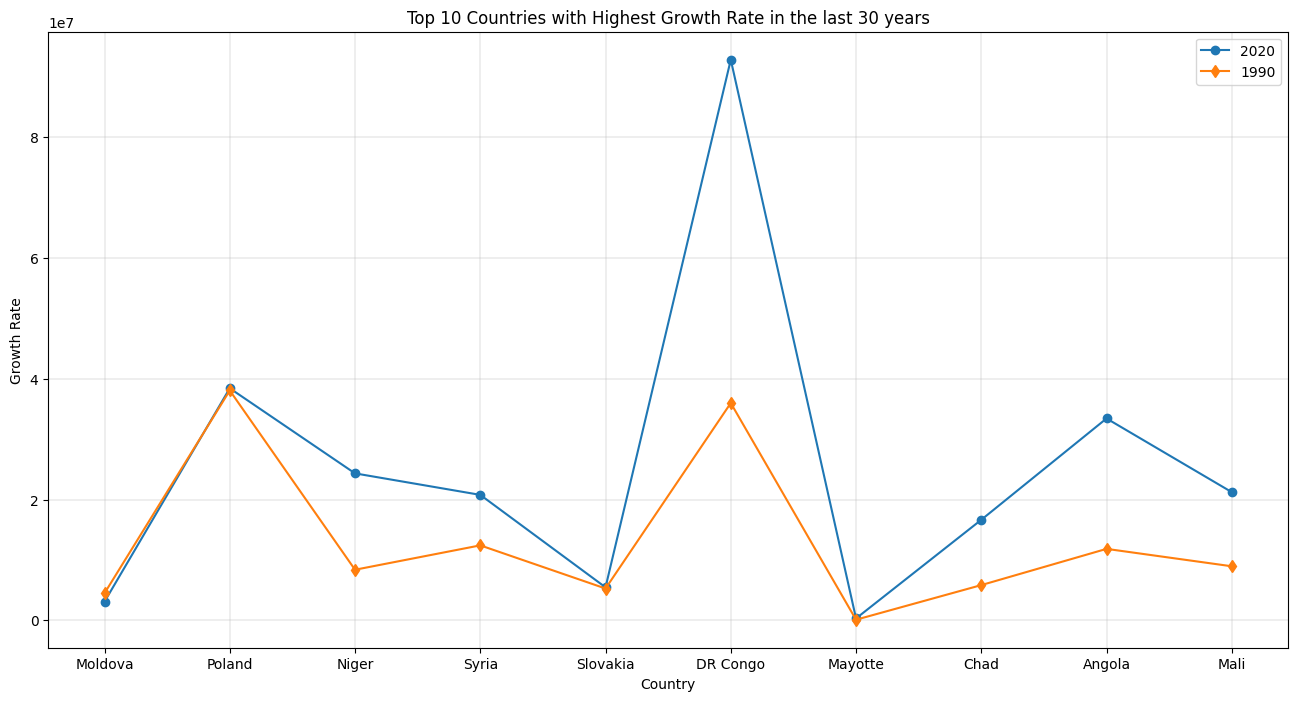

In [34]:
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(gwr_top10['Country'], gwr_top10['2020'], label='2020', marker='o')
plt.plot(gwr_top10['Country'], gwr_top10['1990'], label='1990', marker='d')

plt.xlabel('Country')
plt.ylabel('Growth Rate')
plt.grid(linewidth=0.3)
plt.title('Top 10 Countries with Highest Growth Rate in the last 30 years')
plt.legend()
plt.show()

copiando el data Frame 'df' a 'df_copy'

In [35]:
df_copy = df.copy()
df_copy.head(3)

,Rank,CCA3,Country,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56


In [36]:
df_copy.set_index('Country', inplace=True)

trazado de tendencia de los 10 principales paises mas populosos del mundo

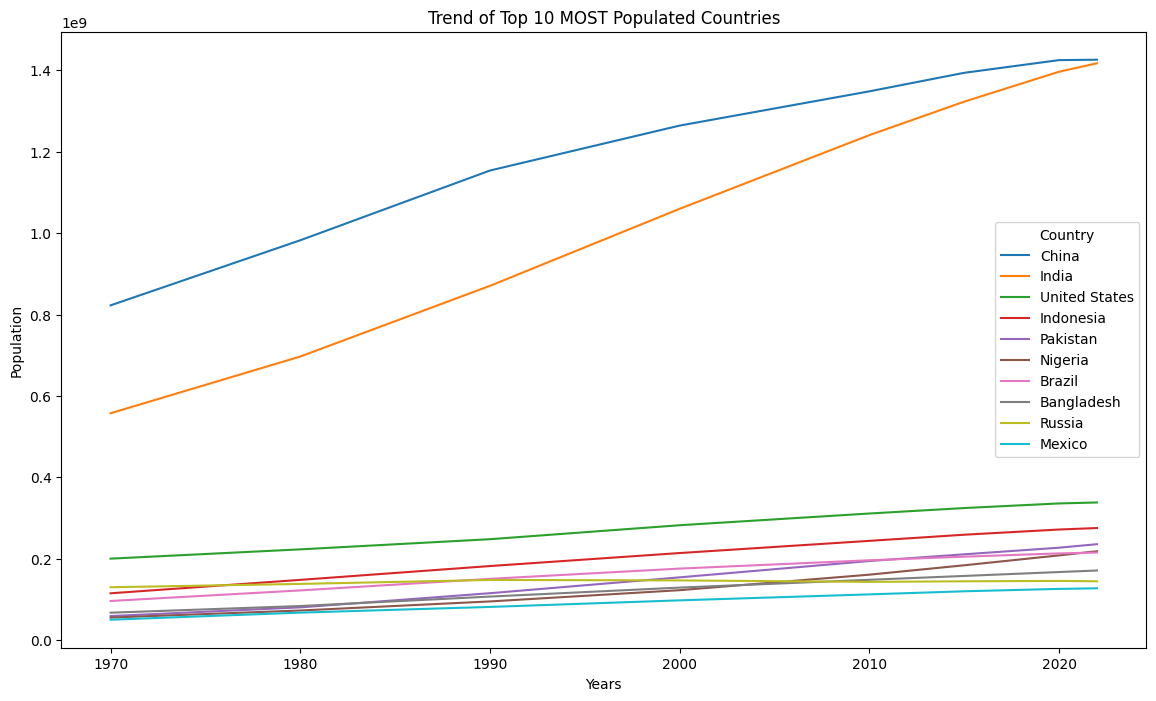

In [37]:
inplace = True 
df_copy.sort_values(by='2022', ascending=False, axis=0, inplace=True)

df_top_10 = df_copy.head(10)

df_top_10 = df_top_10[years].transpose() 

df_top_10.index = df_top_10.index.map(int)
df_top_10.plot(kind='line', figsize=(14, 8)) 

plt.title('Trend of Top 10 MOST Populated Countries')
plt.ylabel('Population')
plt.xlabel('Years')
plt.show()

PROYECCION DE LA POBLACION AL 2030

In [38]:
df['2022'].sum()

7973413042

relación entre años y población total, convertiremos años a tipo intiger

In [39]:
df_tot = pd.DataFrame(df[years].sum(axis=0)) # usamos el metodo sum() para obtener la poblacion total por año
df_tot.index = map(int, df_tot.index) # cambiamos columna años a INT (util para regresion luego)
df_tot.reset_index(inplace = True) # reestablecemos el indice para volver a colocarlo en el data frame
df_tot.columns = ['year', 'total'] # renombramos las columnas

df_tot.head()

,year,total
0,1970,3694136661
1,1980,4442400371
2,1990,5314191665
3,2000,6147055703
4,2010,6983784998


trazamos un gráfico de dispersión por año frente a la población total

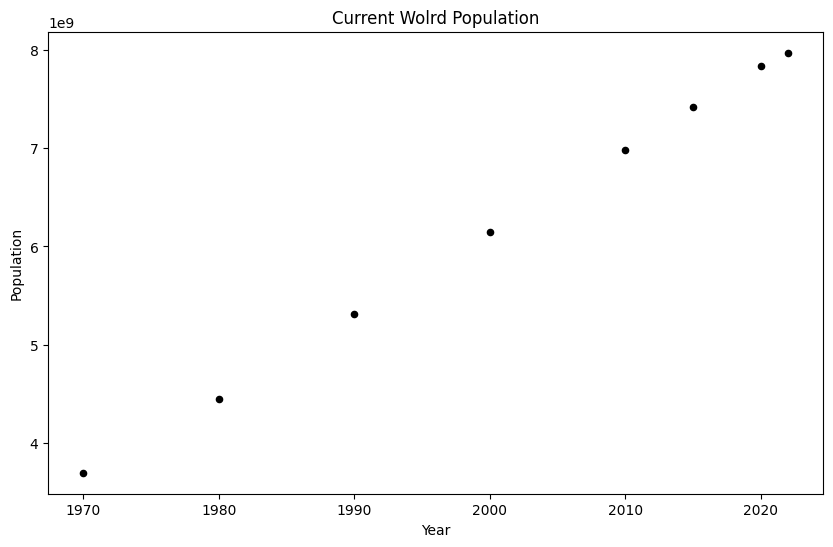

In [41]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='black')

plt.title('Current Wolrd Population')
plt.xlabel('Year')
plt.ylabel('Population')

plt.show()

entrenando el data frame

In [42]:
x = df_tot['year']      
y = df_tot['total']    
fit = np.polyfit(x, y, deg=1)

fit

array([ 8.33710451e+07, -1.60587660e+11])

trazamos la línea de regresión en el diagrama de dispersión

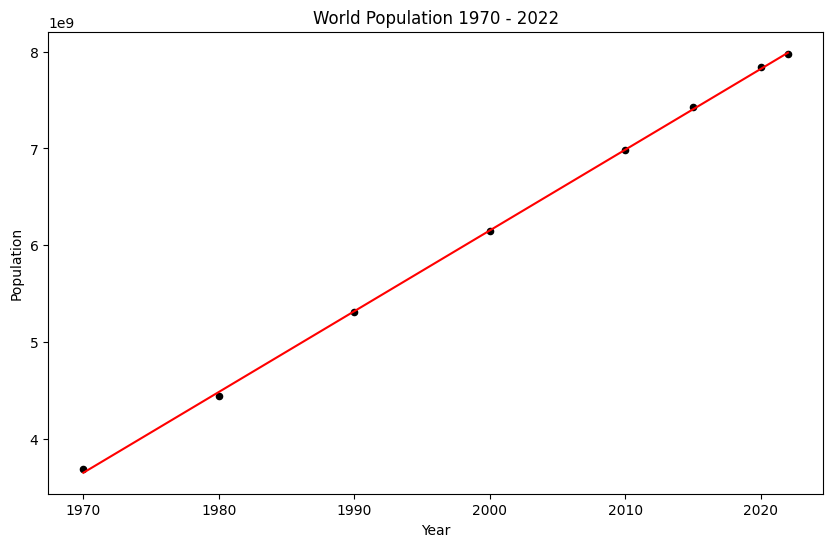

'World Population = 83371045 * Year + -160587659522'

In [43]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='black')

plt.title('World Population 1970 - 2022')
plt.xlabel('Year')
plt.ylabel('Population')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'World Population = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

PROYECCION DE LA POBLACION POR CONTINENTE

* CREACION DE LOS DATAFRAMES POR CONTINENTES

In [48]:
# Asia
asian_countries = df.loc[df["Continent"]=="Asia"].sort_values(by=["2022"], ascending=False, ignore_index=True)
# Africa
african_countries = df.loc[df["Continent"]=="Africa"].sort_values(by=["2022"], ascending=False, ignore_index=True)
# Europe
european_countries = df.loc[df["Continent"]=="Europe"].sort_values(by=["2022"], ascending=False, ignore_index=True)
# North America
na_countries = df.loc[df["Continent"]=="North America"].sort_values(by=["2022"], ascending=False, ignore_index=True)
# Oceania
oc_countries = df.loc[df["Continent"]=="Oceania"].sort_values(by=["2022"], ascending=False, ignore_index=True)
# South America
sa_countries = df.loc[df["Continent"]=="South America"].sort_values(by=["2022"], ascending=False, ignore_index=True)



<Axes: title={'center': 'South America Top 5 LEAST Populated Countries'}, xlabel='Country', ylabel='Population'>

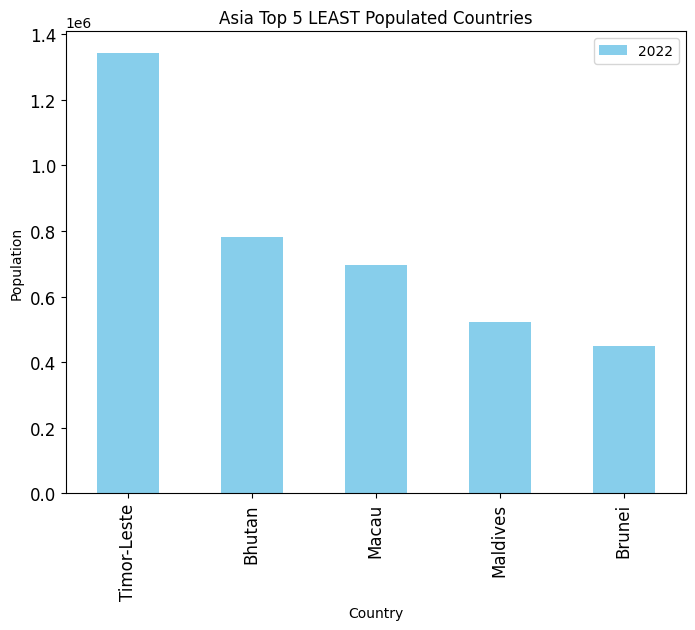

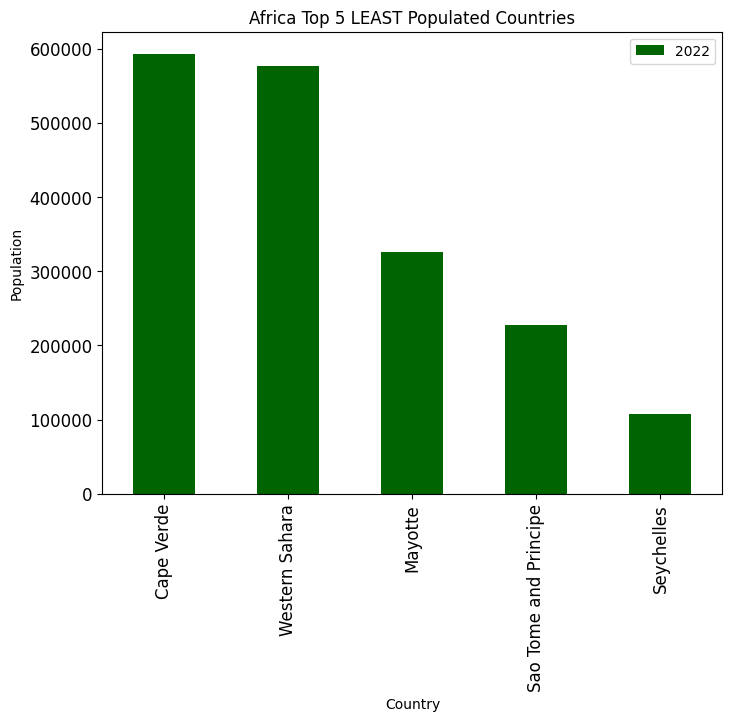

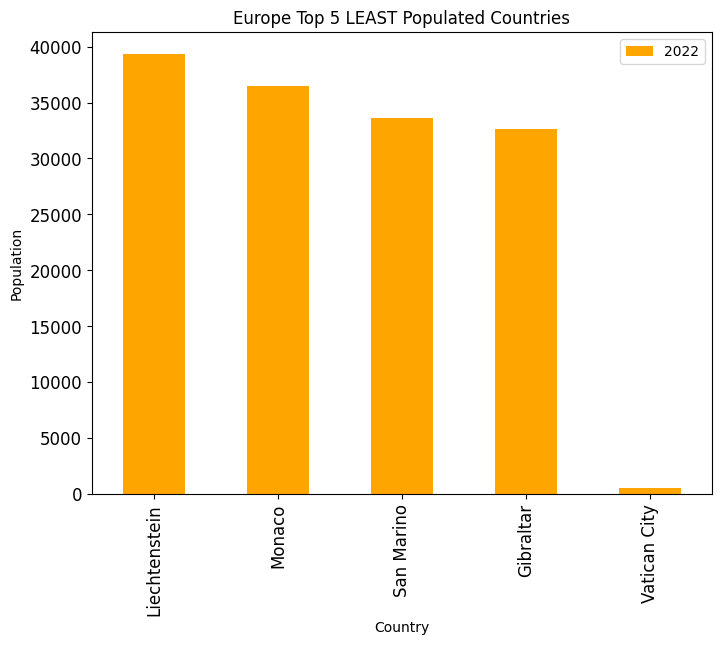

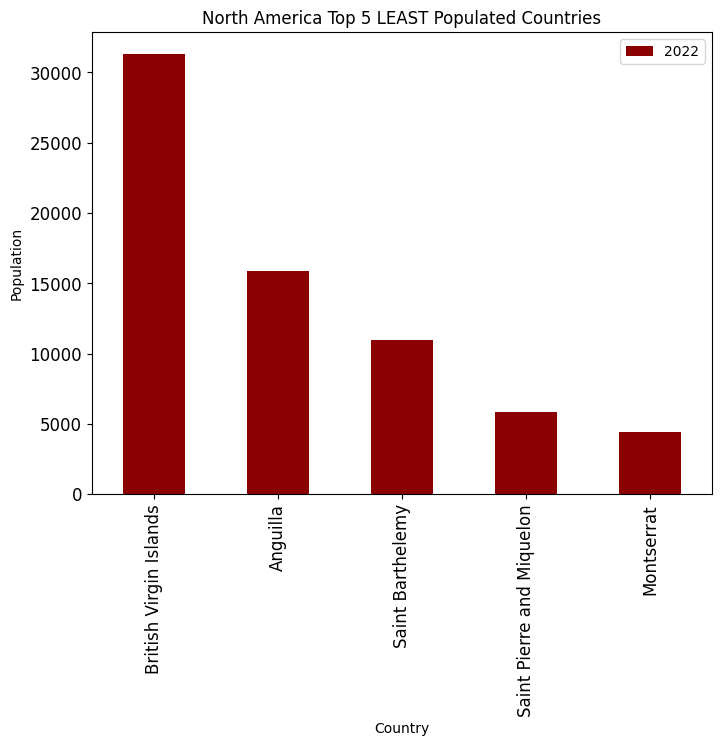

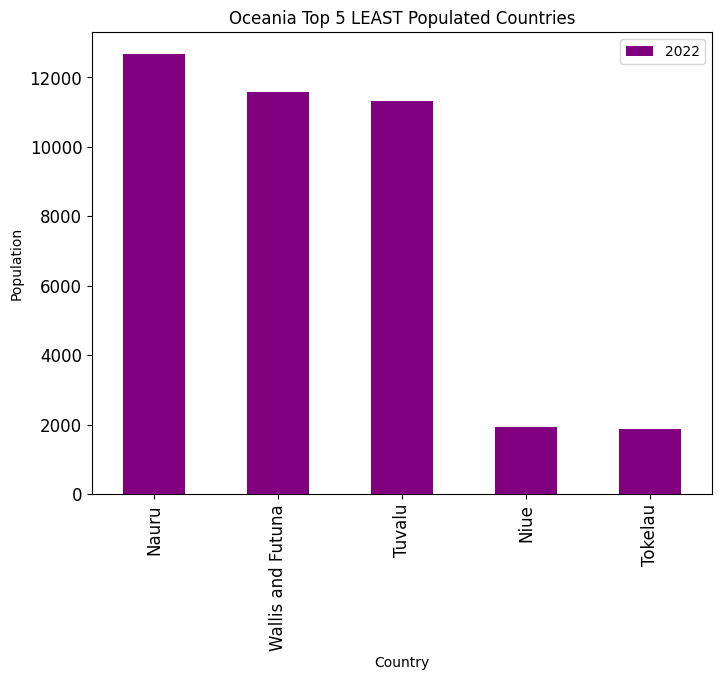

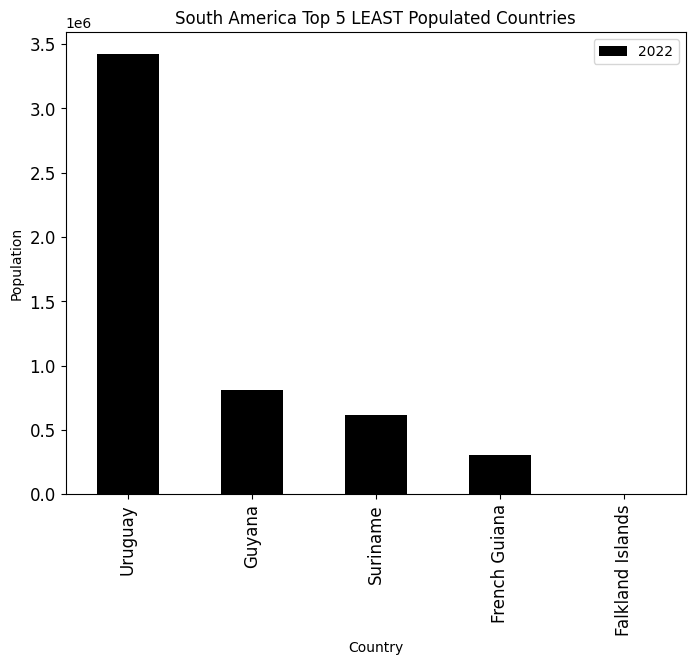

In [49]:
asian_countries[["Country", "2022"]].sort_values(by="2022", ascending=False).tail(5).plot.bar(x="Country", ylabel="Population", title="Asia Top 5 LEAST Populated Countries", figsize=(8,6), color = 'skyblue', fontsize=12)
african_countries[["Country", "2022"]].sort_values(by="2022", ascending=False).tail(5).plot.bar(x="Country", ylabel="Population", title="Africa Top 5 LEAST Populated Countries", figsize=(8,6), color = 'darkgreen', fontsize=12)
european_countries[["Country", "2022"]].sort_values(by="2022", ascending=False).tail(5).plot.bar(x="Country", ylabel="Population", title="Europe Top 5 LEAST Populated Countries", figsize=(8,6), color = 'orange', fontsize=12)
na_countries[["Country", "2022"]].sort_values(by="2022", ascending=False).tail(5).plot.bar(x="Country", ylabel="Population", title="North America Top 5 LEAST Populated Countries", figsize=(8,6), color = 'darkred', fontsize=12)
oc_countries[["Country", "2022"]].sort_values(by="2022", ascending=False).tail(5).plot.bar(x="Country", ylabel="Population", title="Oceania Top 5 LEAST Populated Countries", figsize=(8,6), color = 'purple', fontsize=12)
sa_countries[["Country", "2022"]].sort_values(by="2022", ascending=False).tail(5).plot.bar(x="Country", ylabel="Population", title="South America Top 5 LEAST Populated Countries", figsize=(8,6), color = 'black', fontsize=12)

ASIA AL 2030

POBLACION ACTUAL (4.7 billones)

In [50]:
asian_countries['2022'].sum()

4721383274

relación entre los años y la población total de Asia, convertiremos los años a tipo INT

In [44]:
df_a230 = df[(df['Continent'] == 'Asia')] 
df_asia_tot = pd.DataFrame(df_a230[years].sum(axis=0)) 
df_asia_tot.index = map(int, df_asia_tot.index) 
df_asia_tot.reset_index(inplace = True) 
df_asia_tot.columns = ['year', 'total']
df_asia_tot.tail()

,year,total
3,2000,3735089604
4,2010,4220041327
5,2015,4458250182
6,2020,4663086535
7,2022,4721383274


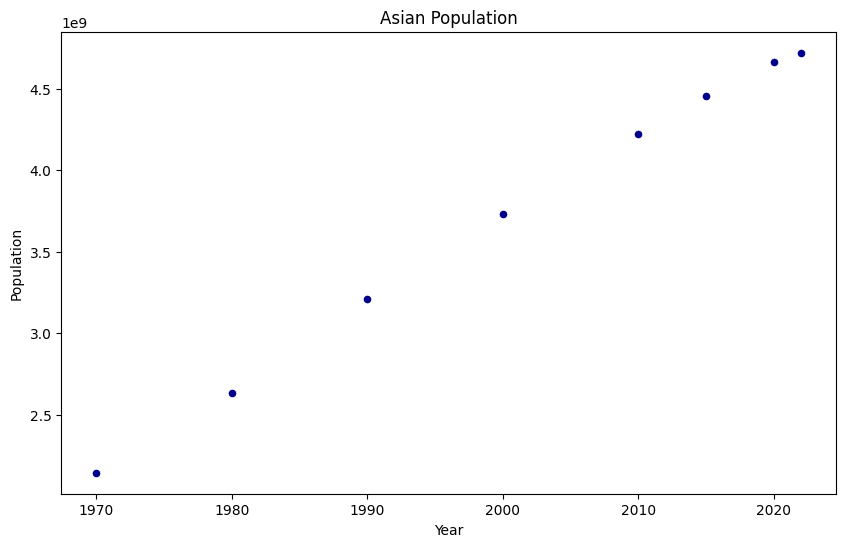

In [45]:
df_asia_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Asian Population')
plt.xlabel('Year')
plt.ylabel('Population')

plt.show()

ENTRENANDO LA DATA DE ASIA

In [46]:
x_as = df_asia_tot['year']      
y_as = df_asia_tot['total']    
fit_as = np.polyfit(x_as, y_as, deg=1)

fit_as

array([ 5.03219504e+07, -9.69643506e+10])

trazado de la línea de regresión de la población asiática en el diagrama de dispersión

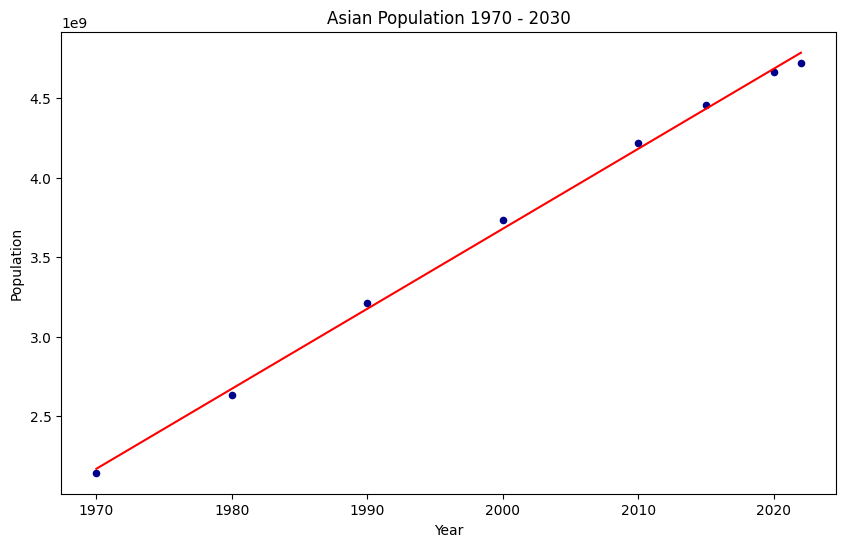

'Asian Population = 50321950 * Year + -96964350561'

In [57]:
df_asia_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Asian Population 1970 - 2030')
plt.xlabel('Year')
plt.ylabel('Population')

# plot line of best fit
plt.plot(x_as, fit_as[0] * x_as + fit_as[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit_as[0], fit_as[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'Asian Population = {0:.0f} * Year + {1:.0f}'.format(fit_as[0], fit_as[1])

AFRICA AL 2030

POBLACION ACTUAL (1.4 billones)

In [51]:
african_countries['2022'].sum()

1426730932

relación entre los años y la población total de Asia, convertiremos los años a tipo int.

In [52]:
df_af230 = df[(df['Continent'] == 'Africa')] 
df_afri_tot = pd.DataFrame(df_af230[years].sum(axis=0)) 
df_afri_tot.index = map(int, df_afri_tot.index) 
df_afri_tot.reset_index(inplace = True) 
df_afri_tot.columns = ['year', 'total']
df_afri_tot.tail()

,year,total
3,2000,818946032
4,2010,1055228072
5,2015,1201102442
6,2020,1360671810
7,2022,1426730932


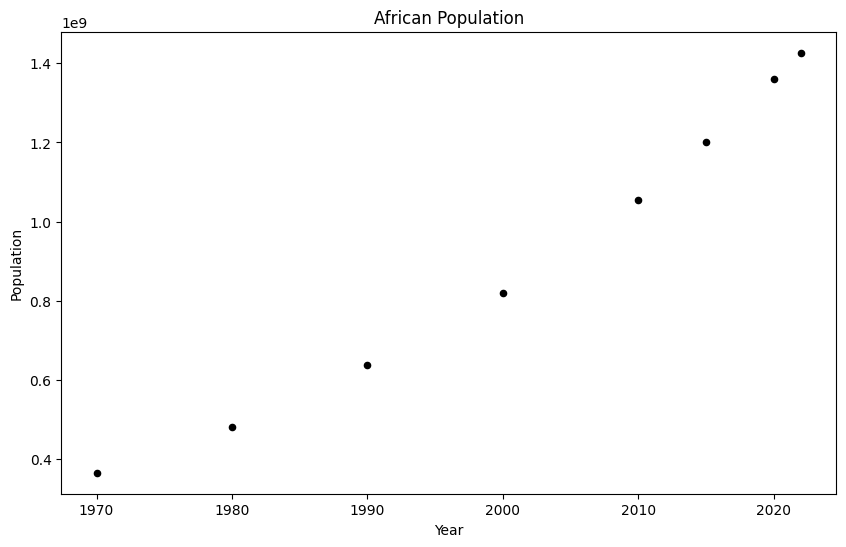

In [53]:
df_afri_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='black')

plt.title('African Population')
plt.xlabel('Year')
plt.ylabel('Population')

plt.show()

ENTRENANDO LA DATA

In [54]:
x_af = df_afri_tot['year']      
y_af = df_afri_tot['total']    
fit_af = np.polyfit(x_af, y_af, deg=1)

fit_af

array([ 2.06561727e+07, -4.04119432e+10])

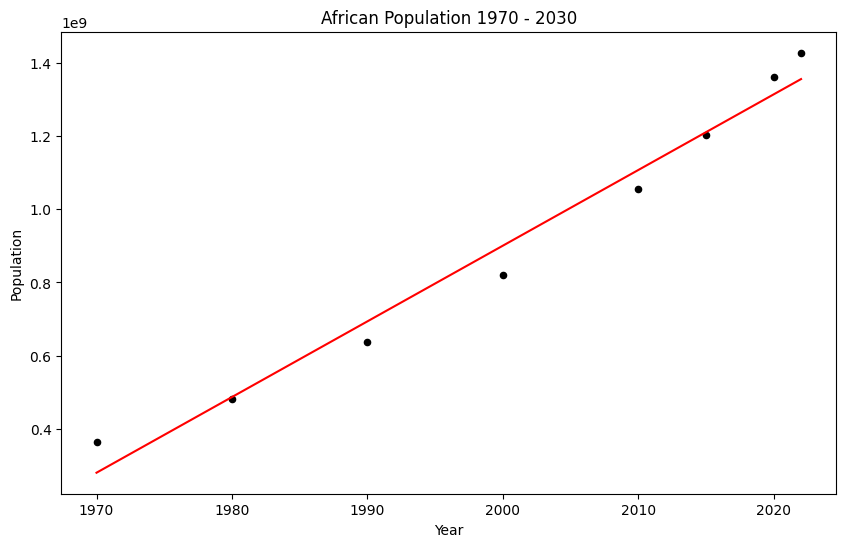

In [56]:
df_afri_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='black')

plt.title('African Population 1970 - 2030')
plt.xlabel('Year')
plt.ylabel('Population')

# plot line of best fit
plt.plot(x_af, fit_af[0] * x_af + fit_af[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit_af[0], fit_af[1]), xy=(2000, 150000))

plt.show()



EUROPA AL 2030


POBLACION ACTUAL (743 millones)

In [58]:
european_countries['2022'].sum()

743147538

relación entre los años y la población total de Europa, convertiremos los años a tipo int.

In [59]:
df_eu230 = df[(df['Continent'] == 'Europe')] 
df_eu_tot = pd.DataFrame(df_eu230[years].sum(axis=0)) 
df_eu_tot.index = map(int, df_eu_tot.index) 
df_eu_tot.reset_index(inplace = True) 
df_eu_tot.columns = ['year', 'total']
df_eu_tot.tail()

,year,total
3,2000,726093423
4,2010,735613934
5,2015,741535608
6,2020,745792196
7,2022,743147538


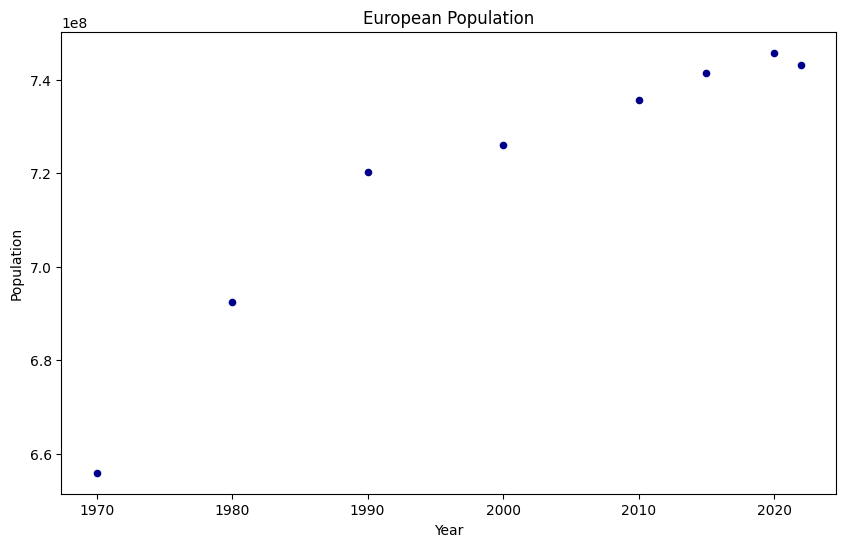

In [60]:
df_eu_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('European Population')
plt.xlabel('Year')
plt.ylabel('Population')

plt.show()

ENTRENANDO LA DATA

In [61]:
x_eu = df_eu_tot['year']      
y_eu = df_eu_tot['total']    
fit_eu = np.polyfit(x_eu, y_eu, deg=1)

fit_eu

array([ 1.52598839e+06, -2.33319268e+09])

trazado de la línea de regresión de la población europea en el diagrama de dispersión

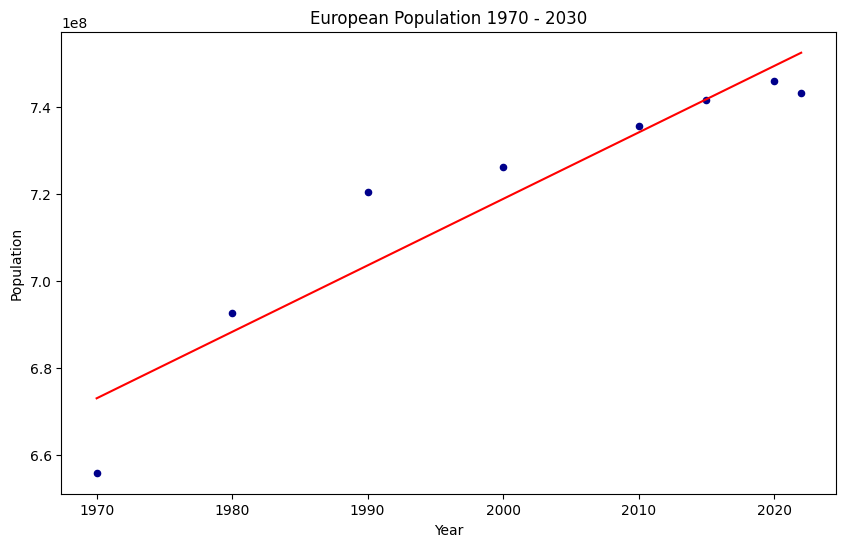

In [63]:
df_eu_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('European Population 1970 - 2030')
plt.xlabel('Year')
plt.ylabel('Population')

# plot line of best fit
plt.plot(x_eu, fit_eu[0] * x_eu + fit_eu[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit_eu[0], fit_eu[1]), xy=(2000, 150000))

plt.show()

NORTE AMERICA 2030

POBLACION ACTUAL (600 millones )

In [64]:
na_countries['2022'].sum()

600296136

relación entre los años y la población total de Asia, convertiremos los años a tipo int.

In [65]:
df_na230 = df[(df['Continent'] == 'North America')] 
df_na_tot = pd.DataFrame(df_na230[years].sum(axis=0)) 
df_na_tot.index = map(int, df_na_tot.index) 
df_na_tot.reset_index(inplace = True) 
df_na_tot.columns = ['year', 'total']

df_na_tot.tail()

,year,total
3,2000,486069584
4,2010,542720651
5,2015,570383850
6,2020,594236593
7,2022,600296136


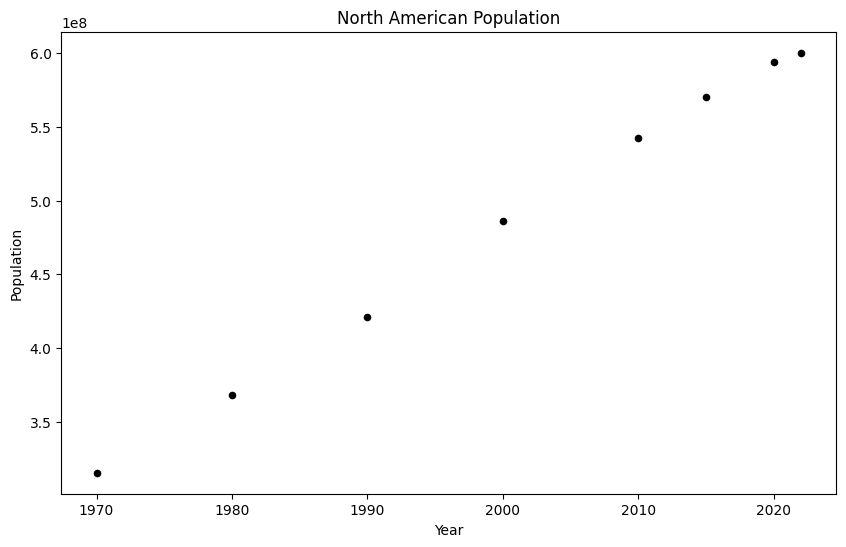

In [66]:
df_na_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='black')

plt.title('North American Population')
plt.xlabel('Year')
plt.ylabel('Population')

plt.show()

ENTRENANDO LA DATA

In [67]:
x_na = df_na_tot['year']      
y_na = df_na_tot['total']    
fit_na = np.polyfit(x_na, y_na, deg=1)

fit_na

array([ 5.61735693e+06, -1.07522914e+10])

trazado de la línea de regresión de la población de América del Norte en el diagrama de dispersión

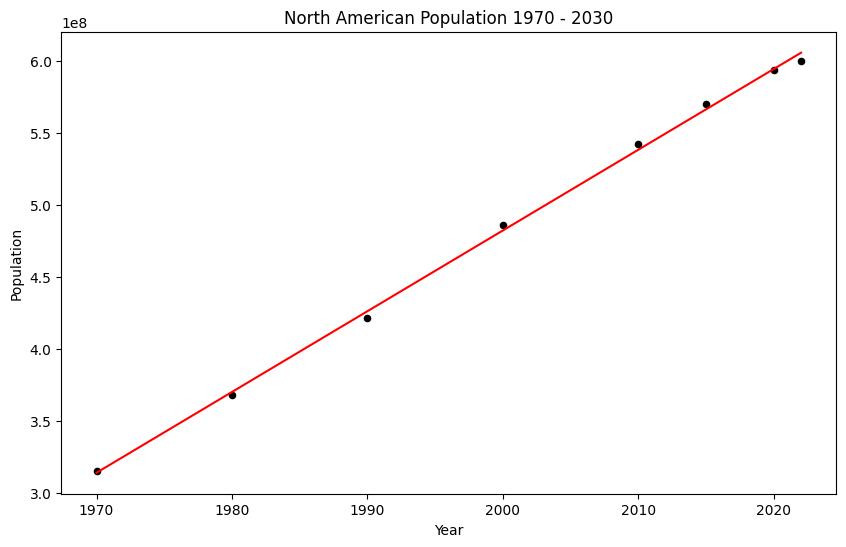

In [69]:
df_na_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='black')

plt.title('North American Population 1970 - 2030')
plt.xlabel('Year')
plt.ylabel('Population')

# plot line of best fit
plt.plot(x_na, fit_na[0] * x_na + fit_na[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit_na[0], fit_na[1]), xy=(2000, 150000))

plt.show()

OCEANIA 2030

POBLACION ACTUAL (45 millones)

In [70]:
oc_countries['2022'].sum()

45038554

relación entre los años y la población total de Oceania, convertiremos los años a tipo int.

In [72]:
df_oc230 = df[(df['Continent'] == 'Oceania')] 
df_oc_tot = pd.DataFrame(df_oc230[years].sum(axis=0)) 
df_oc_tot.index = map(int, df_oc_tot.index) 
df_oc_tot.reset_index(inplace = True) 
df_oc_tot.columns = ['year', 'total']
df_oc_tot.tail()

,year,total
3,2000,31222778
4,2010,37102764
5,2015,40403283
6,2020,43933426
7,2022,45038554


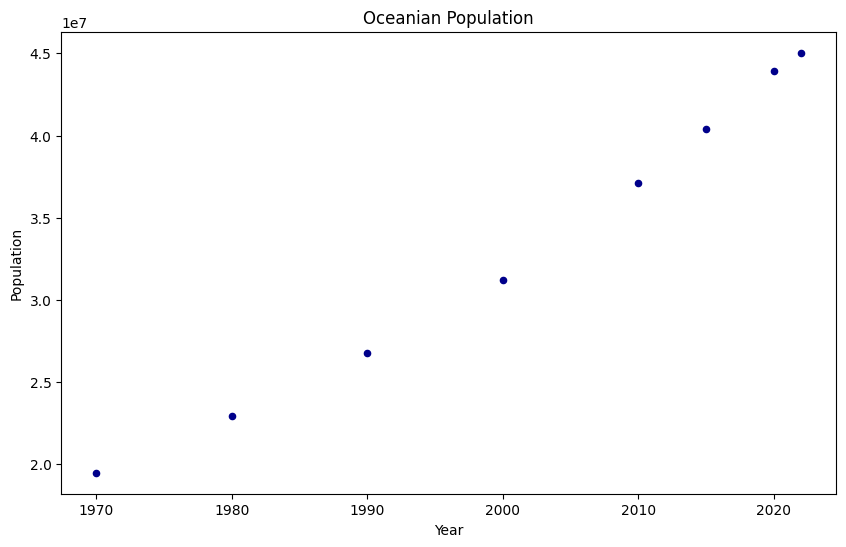

In [73]:
df_oc_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Oceanian Population')
plt.xlabel('Year')
plt.ylabel('Population')

plt.show()

ENTRENANDO LA DATA

In [74]:
x_oc = df_oc_tot['year']      
y_oc = df_oc_tot['total']    
fit_oc = np.polyfit(x_oc, y_oc, deg=1)

fit_oc

array([ 5.00543813e+05, -9.68169960e+08])

trazado de la línea de regresión de la población de Oceanía en el diagrama de dispersión

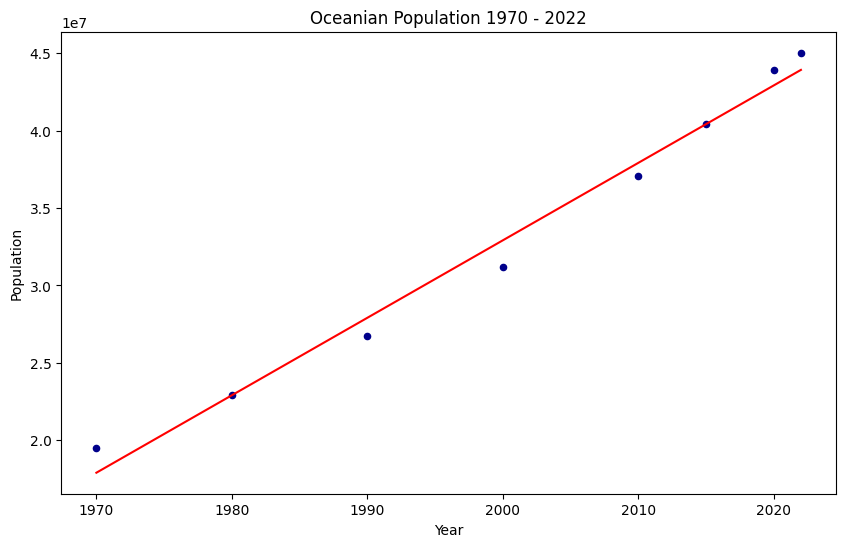

In [75]:
df_oc_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Oceanian Population 1970 - 2022')
plt.xlabel('Year')
plt.ylabel('Population')

# plot line of best fit
plt.plot(x_oc, fit_oc[0] * x_oc + fit_oc[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit_oc[0], fit_oc[1]), xy=(2000, 150000))

plt.show()

AMERICA DEL SUR 2030

POBLACION ACTUAL (436 millones)

In [76]:
sa_countries['2022'].sum()

436816608

relación entre los años y la población total de America del Sur, convertiremos los años a tipo int.

In [77]:
df_sa230 = df[(df['Continent'] == 'South America')] 
df_sa_tot = pd.DataFrame(df_sa230[years].sum(axis=0)) 
df_sa_tot.index = map(int, df_sa_tot.index) 
df_sa_tot.reset_index(inplace = True) 
df_sa_tot.columns = ['year', 'total']
df_sa_tot.tail()

,year,total
3,2000,349634282
4,2010,393078250
5,2015,413134396
6,2020,431530043
7,2022,436816608


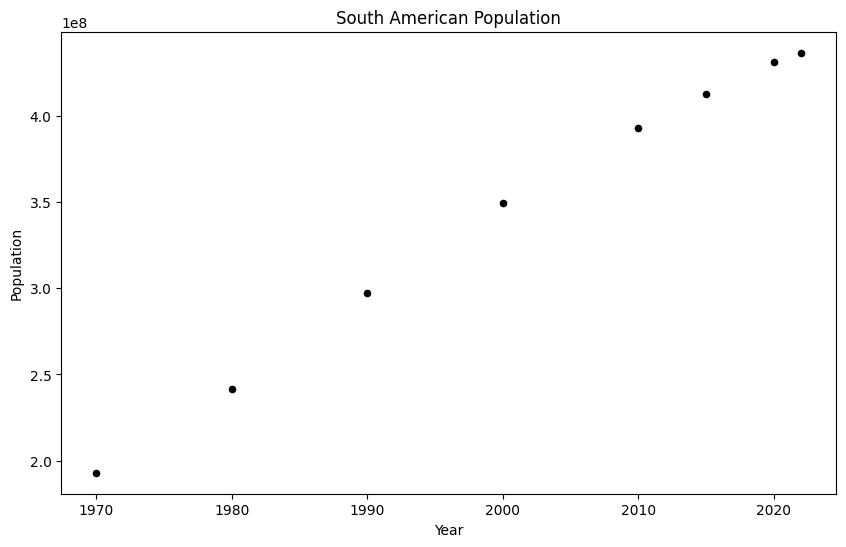

In [78]:
df_sa_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='black')

plt.title('South American Population')
plt.xlabel('Year')
plt.ylabel('Population')

plt.show()

ENTRENANDO LA DATA

In [79]:
x_sa = df_sa_tot['year']      
y_sa = df_sa_tot['total']    
fit_sa = np.polyfit(x_sa, y_sa, deg=1)

fit_sa

array([ 4.74903293e+06, -9.15771175e+09])

trazado de la línea de regresión de la población de America del Sur en el diagrama de dispersión

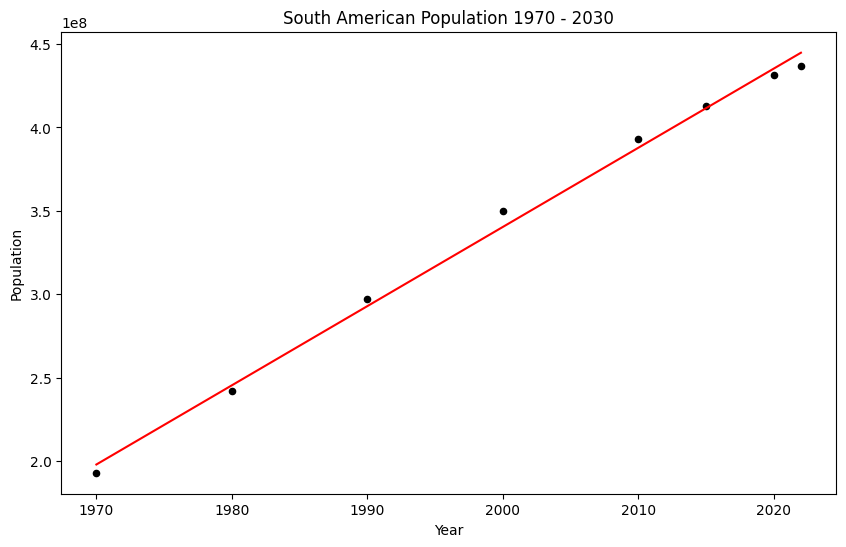

In [81]:
df_sa_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='black')

plt.title('South American Population 1970 - 2030')
plt.xlabel('Year')
plt.ylabel('Population')

plt.plot(x_sa, fit_sa[0] * x_sa + fit_sa[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit_sa[0], fit_sa[1]), xy=(2000, 150000))

plt.show()